In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
path1 = './data/jiqixuexi.txt'

with open(path1,'r',encoding='utf8') as f:
    html = f.read()
    
soup = BeautifulSoup(html,'lxml')

In [16]:
zhuanlan_list = soup.find_all("div",{"class":"List-item"})

In [26]:
print(zhuanlan_list[0].prettify())

<div class="List-item" data-reactid="76">
 <div class="ContentItem" data-reactid="77" data-za-detail-view-path-index="0" data-za-detail-view-path-module="ColumnItem" data-za-extra-module='{"card":{"content":{"type":"Column","token":"mlearn"}},"attached_info_bytes":"OlQKC3BsYWNlaG9sZGVyEiBmZTc4NzMwMDdmYjEwYzYxMjkwZDQyYTdkYWM3Y2QxZRgFIgUxNjIwNSoGbWxlYXJuSgzmnLrlmajlrabkuaBQAFgEYAE="}'>
  <div class="ContentItem-main" data-reactid="78">
   <div class="ContentItem-image" data-reactid="79">
    <a class="ColumnLink" data-reactid="80" href="//zhuanlan.zhihu.com/mlearn" target="_blank">
     <div class="Popover" data-reactid="81">
      <div aria-expanded="false" aria-haspopup="true" aria-owns="Popover-35263-666-content" data-reactid="82" id="Popover-35263-666-toggle">
       <img alt="&lt;em&gt;机器学习&lt;/em&gt;笔记" class="Avatar Avatar--large" data-reactid="83" height="60" src="https://pic1.zhimg.com/f53f3e2d5137f84efded39c82d614f0b_im.jpg" srcset="https://pic1.zhimg.com/f53f3e2d5137f84efded39

In [20]:

zhuanlan_list[0].find('span',{'class':'Highlight'}).get_text()

'机器学习笔记'

In [22]:
zhuanlan_list[0].find('span',{'class':'UserLink'}).get_text()

'子楠'

In [25]:
zhuanlan_list[0].find('div',{'class':'RichText SearchItem-meta Highlight'}).get_text()

'机器学习的笔记。非常浅显。不得不说ng的课很适合入门，几乎不需要太多的数学基础'

In [28]:
zhuanlan_list[0].find('a',{'class':'ColumnLink'}).get('href')

'//zhuanlan.zhihu.com/mlearn'

In [37]:
zhuanlan_list[0].find_all('a',{'class':'ContentItem-statusItem Search-statusLink'})[0].get_text()

'5873 关注'

In [ ]:
zhuanlan_list[0].find('a',{'class':'ContentItem-statusItem Search-statusLink'}).get_text().split()[0]

In [39]:
zhuanlan_info = pd.DataFrame()
title = []
author = []
description = []
url = []
articles_count = []
followers = []
# socore = []

for zhuanlan in zhuanlan_list:
    title.append(zhuanlan.find('span',{'class':'Highlight'}).get_text())
    author.append(zhuanlan.find('span',{'class':'UserLink'}).get_text())
    description.append(zhuanlan.find('div',{'class':'RichText SearchItem-meta Highlight'}).get_text())
    url.append('https:' + zhuanlan.find('a',{'class':'ColumnLink'}).get('href'))
    af = zhuanlan.find_all('a',{'class':'ContentItem-statusItem Search-statusLink'})
    articles_count.append(af[1].get_text().split()[0])
    followers.append(af[0].get_text().split()[0])


In [40]:
zhuanlan_info['title']= title
zhuanlan_info['author']= author
zhuanlan_info['description']= description
zhuanlan_info['url']= url
zhuanlan_info['articles_count']= articles_count
zhuanlan_info['followers']= followers

In [45]:
zhuanlan_info.tail(10)

,title,author,description,url,articles_count,followers
185,数据说,阿萨姆,收录原创机器学习和人工智能相关文章及行业动向展望，欢迎投稿。,https://zhuanlan.zhihu.com/aiinsight,2280 关注,20 文章
186,伐木NLP,李浩,本专栏将在作者工作不饱的时段不定期发布机器学习特别是NLP方向有价值的知识和有趣的应用,https://zhuanlan.zhihu.com/nlp-farming,366 关注,7 文章
187,饮马渭水,最帅的大厨,研究相关：机器学习，计算机视觉，深度学习；每周分享一个算法（含实现）或研究方向相关论文分析一篇,https://zhuanlan.zhihu.com/RoyTao,55 关注,1 文章
188,一个统计系人的自我救赎,mahalanobis,补一些机器学习算法的知识点。,https://zhuanlan.zhihu.com/c_155140116,0 关注,0 文章
189,ThinkStats - 我所理解的数据,链球选手,这个专栏用来记录本渣统计学和机器学习的笔记、心得，如果能对其他人有所帮助自然是好,https://zhuanlan.zhihu.com/understand,232 关注,5 文章
190,Statistics and SAS,Mingjian Tian,"主要涉及数据分析, 数学/统计模型, 机器学习, 大数据, 以及 SAS",https://zhuanlan.zhihu.com/-data-analysis,247 关注,10 文章
191,数海拾荒,Datacruiser,记录大数据分析和机器学习学习历程和心得,https://zhuanlan.zhihu.com/datacruiser,665 关注,44 文章
192,人工智能与固件开发,老狼,机器学习、遗传算法等等和固件的关系,https://zhuanlan.zhihu.com/mlfirmware,494 关注,7 文章
193,自然语言居酒屋,斤木,自然语言与机器学习专栏，主题包括但不限于：经典或state-of-art论文、著作的分享、讨论,https://zhuanlan.zhihu.com/nlp-izakaya,1451 关注,6 文章
194,魔王们的暗黑炼金卷轴,子元用户标识,数理金融相关领域学习笔记及心得。内容包括金融数学、随机分析、概率论、随机过程、数理统计、机器...,https://zhuanlan.zhihu.com/moquant,1517 关注,8 文章


In [47]:
df = pd.read_csv('./data/zhuanlan_info.csv',header=None)
df.columns=['title','author','description','url','articles_count','followers']

In [48]:
df.head()

,title,author,description,url,articles_count,followers
0,机器学习笔记,子楠,机器学习的笔记。非常浅显。不得不说ng的课很适合入门，几乎不需要太多的数学基础,https://zhuanlan.zhihu.com/mlearn,22,5873
1,无痛的机器学习,冯超,专栏主营业务：让更多人能看的懂的机器学习科普+进阶文章。欢迎各位大神投稿或协助审阅,https://zhuanlan.zhihu.com/hsmyy,76,15147
2,Python 与 机器学习,射命丸咲,NaN,https://zhuanlan.zhihu.com/carefree0910-pyml,57,8687
3,开始学习机器人,Top Liu,NaN,https://zhuanlan.zhihu.com/learn-robotics,42,4744
4,机器学习与数据挖掘,Eric Leo,NaN,https://zhuanlan.zhihu.com/Industry4,3,175


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 6 columns):
title             558 non-null object
author            558 non-null object
description       307 non-null object
url               558 non-null object
articles_count    558 non-null int64
followers         558 non-null int64
dtypes: int64(2), object(4)
memory usage: 26.2+ KB


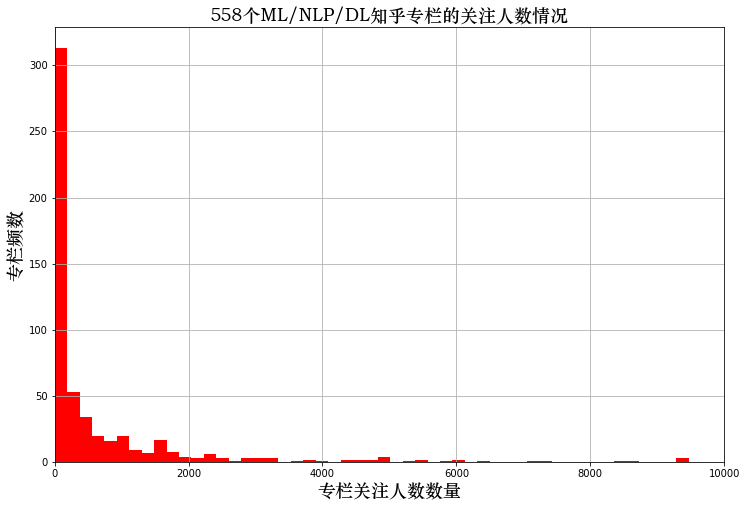

In [72]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df['followers'].hist(bins=200,color='r')
plt.title(u'558个ML/NLP/DL知乎专栏的关注人数情况',{'fontname':'STZhongsong','fontsize':18})
plt.xlim((-1, 10000))
plt.ylabel(u'专栏频数', {'fontname':'STZhongsong','fontsize':18})
plt.xlabel(u'专栏关注人数数量', {'fontname':'STZhongsong','fontsize':18})
plt.show()

In [74]:
len(df[df['followers']>=10000])

7

In [80]:
df[df['followers']>=8000].sort_values(by='followers',ascending=False)

,title,author,description,url,articles_count,followers
148,智能单元,杜客,面向通用人工智能和机器人学习，聚焦深度增强学习，可微神经计算机和生成对抗模型,https://zhuanlan.zhihu.com/intelligentunit,94,37133
166,挖掘知乎里有趣的东西,grapeot,受“看知乎”启发而创建的一个用简单的统计和机器学习来分析知乎数据的地方。,https://zhuanlan.zhihu.com/grapeot,28,36321
420,Python中文社区,阿橙,Python中文开发者的精神部落。会员来自全球十多个国家和地区，拥有金融科技、量化交易、数据...,https://zhuanlan.zhihu.com/zimei,243,34898
231,深度学习大讲堂,果果是枚开心果,推送深度学习的最新消息，包括最新技术进展，使用以及活动，由中科视拓（SeetaTech）运营...,https://zhuanlan.zhihu.com/dlclass,87,22029
1,无痛的机器学习,冯超,专栏主营业务：让更多人能看的懂的机器学习科普+进阶文章。欢迎各位大神投稿或协助审阅,https://zhuanlan.zhihu.com/hsmyy,76,15147
147,Hello 陈然！,陈然用户标识,我叫陈然，常驻旧金山的一名机器学习爱好者。这个博客写一点有趣的小东西,https://zhuanlan.zhihu.com/chenran,30,11209
240,PaperWeekly,张俊,PaperWeekly是一个推荐、解读、讨论、报道人工智能前沿论文成果的学术平台。,https://zhuanlan.zhihu.com/paperweekly,216,11115
136,深度学习与NLP,lqfarmer,专注深度学习、NLP相关技术、资讯，追求纯粹的技术，享受学习、分享的快乐,https://zhuanlan.zhihu.com/lqfarmer,94,9442
11,机器学习算法与自然语言处理,忆臻,公众号[自然语言处理与机器学习] 微信号yizhennotes,https://zhuanlan.zhihu.com/qinlibo-ml,107,9375
150,PRML,郑梓豪,主要是我读过的，觉得有意思的机器学习类论文笔记。,https://zhuanlan.zhihu.com/prml-paper-reading,15,9290


In [93]:
import jieba
def wordCount(data):
    word_dict = {}
    for doc in data:
        if type(doc) == str:
            for word in jieba.cut(doc):
                if len(word)>1:
                    if word not in word_dict.keys():
                        word_dict[word] = 1
                    else:
                        word_dict[word] += 1

    return word_dict

In [96]:
wd = wordCount(df['description'])
wd = sorted(wd.items(), key=lambda d:d[1], reverse = True)

In [98]:
print(wd[:10])

[('学习', 303), ('机器', 135), ('深度', 125), ('分享', 52), ('算法', 45), ('人工智能', 44), ('技术', 39), ('相关', 35), ('专栏', 32), ('知识', 31)]


In [106]:
fre = list(fre)
word = list(word)
fre

[303, 135, 125, 52, 45, 44, 39, 35, 32, 31]

In [100]:
word , fre = zip(*wd[:10])

In [108]:
plt.figure(figsize=(12,8))
plt.plot(kind='bar',word,fre,color='b')
plt.title(u'558个ML/NLP/DL知乎专栏的关注人数情况',{'fontname':'STZhongsong','fontsize':18})
plt.xlim((-1, 10000))
plt.ylabel(u'专栏频数', {'fontname':'STZhongsong','fontsize':18})
plt.xlabel(u'专栏关注人数数量', {'fontname':'STZhongsong','fontsize':18})
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-108-36bed349b009>, line 2)

In [123]:
df2 = pd.read_csv('./data/zhuanlan_article.csv',header=None)
df2.columns=['zhuanlan_url','author','title','article_url','publishedTime','commentsCount','likesCount','content']

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 8 columns):
zhuanlan_url     6536 non-null object
author           6536 non-null object
title            6535 non-null object
url              6536 non-null object
publishedTime    6536 non-null object
commentsCount    6536 non-null float64
likesCount       6536 non-null float64
content          6494 non-null object
dtypes: float64(2), object(6)
memory usage: 408.6+ KB


In [125]:
df2.head()

,zhuanlan_url,author,title,url,publishedTime,commentsCount,likesCount,content
0,https://zhuanlan.zhihu.com/zimei,DealiAxy,编写爬虫自动下载王者荣耀官网上好看的壁纸,https://zhuanlan.zhihu.com/zimei,2017-12-21T15:10:39+08:00,0.0,3.0,前言偶然间发现王者荣耀的官网上发布了这么多好看的壁纸。地址:http://pvp.qq.co...
1,https://zhuanlan.zhihu.com/zimei,weapon,回归算法之线性回归,https://zhuanlan.zhihu.com/zimei,2017-12-22T15:38:48+08:00,0.0,1.0,起步线性回归是利用数理统计和归回分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计...
2,https://zhuanlan.zhihu.com/zimei,栗子君,"python大法好，word, pdf变身html没烦恼",https://zhuanlan.zhihu.com/zimei,2017-12-13T13:14:15+08:00,18.0,91.0,【README.md】Hi 我是栗子君，一枚身在美帝的小程序员。我工作的公司加上老板一共有五...
3,https://zhuanlan.zhihu.com/zimei,猪了个去,python with提前退出：坑与解决方案,https://zhuanlan.zhihu.com/zimei,2018-01-04T15:42:24+08:00,6.0,12.0,问题的起源早些时候使用with实现了一版全局进程锁，希望实现以下效果：with CacheL...
4,https://zhuanlan.zhihu.com/zimei,阿橙,Python中文社区招募2018年专栏作者,https://zhuanlan.zhihu.com/zimei,2018-01-03T17:41:31+08:00,0.0,11.0,Python中文社区致力于成为Python中文开发者的精神部落，目前覆盖各大主流媒体和社交平...


In [114]:
df.sort_values(by='followers',ascending=False,inplace=True)

In [116]:
df = df.reset_index(drop = True)
df.head()

,title,author,description,url,articles_count,followers
0,智能单元,杜客,面向通用人工智能和机器人学习，聚焦深度增强学习，可微神经计算机和生成对抗模型,https://zhuanlan.zhihu.com/intelligentunit,94,37133
1,挖掘知乎里有趣的东西,grapeot,受“看知乎”启发而创建的一个用简单的统计和机器学习来分析知乎数据的地方。,https://zhuanlan.zhihu.com/grapeot,28,36321
2,Python中文社区,阿橙,Python中文开发者的精神部落。会员来自全球十多个国家和地区，拥有金融科技、量化交易、数据...,https://zhuanlan.zhihu.com/zimei,243,34898
3,深度学习大讲堂,果果是枚开心果,推送深度学习的最新消息，包括最新技术进展，使用以及活动，由中科视拓（SeetaTech）运营...,https://zhuanlan.zhihu.com/dlclass,87,22029
4,无痛的机器学习,冯超,专栏主营业务：让更多人能看的懂的机器学习科普+进阶文章。欢迎各位大神投稿或协助审阅,https://zhuanlan.zhihu.com/hsmyy,76,15147


In [120]:
with open('md.txt','a+') as f:
    for i in df.index:
        f.write('<tr>\n')
        f.write('<td>['+df.loc[i,'title']+']('+df.loc[i,'url']+')</td>\n')
        f.write('<td>'+df.loc[i,'author']+'</td>\n')
        f.write('<td>'+str(df.loc[i,'description'])+'</td>\n')
        f.write('<td>'+df.loc[i,'url']+'</td>\n')
        f.write('<td>'+str(df.loc[i,'articles_count'])+'</td>\n') 
        f.write('<td>'+str(df.loc[i,'followers'])+'</td>\n')
        f.write('</tr>\n')
        f.write('\n')